In [1]:



import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import warnings
from pandas.tseries.offsets import MonthBegin
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', r'elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison(.*)')


# SUSPENSIONES PARTE 1

archivo = r'C:\COSAS\10 OCTUBRE\113100 SA 20 V1.2 OCTUBRE.xlsm'

#bASE Urgencias 
df21 = pd.read_excel(archivo, sheet_name='A08',skiprows=10,usecols=['Unnamed: 0','Ambos Sexos'])
df22 = df21.rename(columns={'Unnamed: 0':'Tipo_atencion'})
df23=df22.query("Tipo_atencion in ('ATENCIÓN MÉDICA NIÑO Y ADULTO','ATENCIÓN MÉDICA GINECO-OBSTETRA','ATENCIÓN POR MATRONA')")
df23

,Tipo_atencion,Ambos Sexos
0,ATENCIÓN MÉDICA NIÑO Y ADULTO,6688
1,ATENCIÓN MÉDICA GINECO-OBSTETRA,735
2,ATENCIÓN POR MATRONA,1320


In [2]:
#Base suspensiones
df1 = pd.read_excel(archivo, sheet_name='A21',skiprows=59,usecols=['Unnamed: 0','PACIENTES PROGRAMADOS','Unnamed: 6','PACIENTES SUSPENDIDOS','Unnamed: 8'])
df2 = df1.rename(columns={'Unnamed: 0':'Especialidad'})
df3=df2.query("Especialidad in ('CIRUGÍA GENERAL','CIRUGÍA CARDIOVASCULAR','CIRUGÍA MÁXILOFACIAL','CIRUGÍA TÓRAX','TRAUMATOLOGÍA','NEUROCIRUGÍA','OTORRINOLARINGOLOGÍA','OFTALMOLOGÍA','OBSTETRICIA Y GINECOLOGÍA','GINECOLOGÍA','UROLOGÍA','RESTO ESPECIALIDADES')")
df3['PACIENTES PROGRAMADOS'] = df3['PACIENTES PROGRAMADOS'].astype(float)
df3['Unnamed: 6'] = df3['Unnamed: 6'].astype(float)
df3['PACIENTES SUSPENDIDOS'] = df3['PACIENTES SUSPENDIDOS'].astype(float)
df3['Unnamed: 8'] = df3['Unnamed: 8'].astype(float)
df3['PACIENTES_PROGRAMADOS'] = df3[['PACIENTES PROGRAMADOS','Unnamed: 6']].sum(axis=1)
df3['PACIENTES_SUSPENDIDOS'] = df3[['PACIENTES SUSPENDIDOS','Unnamed: 8']].sum(axis=1)

df4 = df3[['Especialidad','PACIENTES_PROGRAMADOS','PACIENTES_SUSPENDIDOS']]

df5 = pd.DataFrame({'Especialidad': ['CIRUGÍA GENERAL','TRAUMATOLOGÍA','NEUROCIRUGÍA','OTORRINOLARINGOLOGÍA','OFTALMOLOGÍA','OBSTETRICIA Y GINECOLOGÍA','GINECOLOGÍA','UROLOGÍA','RESTO ESPECIALIDADES'],
                    'SC': ['CIR', 'TMT', 'NEC','OTO','OFT','OBST','GINE','URO','PENS']})


indexed= df4.set_index('Especialidad') 
df6 = pd.merge( df5,  indexed , how = 'left', on='Especialidad' ) 
df6

,Especialidad,SC,PACIENTES_PROGRAMADOS,PACIENTES_SUSPENDIDOS
0,CIRUGÍA GENERAL,CIR,252.0,49.0
1,TRAUMATOLOGÍA,TMT,161.0,56.0
2,NEUROCIRUGÍA,NEC,35.0,6.0
3,OTORRINOLARINGOLOGÍA,OTO,28.0,7.0
4,OFTALMOLOGÍA,OFT,57.0,25.0
5,OBSTETRICIA Y GINECOLOGÍA,OBST,35.0,0.0
6,GINECOLOGÍA,GINE,57.0,2.0
7,UROLOGÍA,URO,82.0,9.0
8,RESTO ESPECIALIDADES,PENS,1.0,0.0


In [3]:
#Dental
df15 = pd.read_excel(archivo, sheet_name='A09',skiprows=10,usecols=['Unnamed: 0','Ambos Sexos'])
df16 = df15.rename(columns={'Unnamed: 0':'actividad'})
df17=df16.query("actividad in ('CONSULTA DE MORBILIDAD','CONSULTA DE URGENCIA (GES)')")
df17['Ambos Sexos'] = df17['Ambos Sexos'].astype(float)

df17['DENTAL UEH'] = df17[['Ambos Sexos']].sum(axis=1)

df17

,actividad,Ambos Sexos,DENTAL UEH
0,CONSULTA DE MORBILIDAD,0.0,0.0
2,CONSULTA DE URGENCIA (GES),0.0,0.0


In [4]:
# REM 24 PARTO Y ACOMPAÑAMIENTO

df7 = pd.read_excel(archivo, sheet_name='A24',skiprows=9,usecols=['Unnamed: 0','Total **'])
df8=df7.rename(columns={'Unnamed: 0':'Tipo_parto','Total **':'Total'})
df9=df8.query("Tipo_parto in ('TOTAL PARTOS','NORMAL/VAGINAL','DISTÓCICO VAGINAL','CESÁREA ELECTIVA','CESÁREA URGENCIA','ABORTOS','PARTO NORMAL VERTICAL (*)','PARTO FUERA ESTABLECIMIENTO DE SALUD','EMBARAZO NO CONTROLADO')")
df9['Total'] = df9['Total'].astype(float)
df9

,Tipo_parto,Total
0,TOTAL PARTOS,314.0
1,NORMAL/VAGINAL,183.0
2,DISTÓCICO VAGINAL,9.0
3,CESÁREA ELECTIVA,30.0
4,CESÁREA URGENCIA,92.0
5,ABORTOS,32.0
6,PARTO NORMAL VERTICAL (*),1.0
8,PARTO FUERA ESTABLECIMIENTO DE SALUD,1.0
9,EMBARAZO NO CONTROLADO,4.0


In [5]:
#Acompañamiento en el parto

df10 = pd.read_excel(archivo, sheet_name='A24',skiprows=29,usecols=['EVENTO','TOTAL'])
df11=df10.query("EVENTO in ('SOLO EN EL PARTO','PRE PARTO Y PARTO')")
df11  

,EVENTO,TOTAL
0,SOLO EN EL PARTO,235
1,PRE PARTO Y PARTO,3


In [6]:
# REM 8  URGENCIAS

df12 = pd.read_excel(archivo, sheet_name='A08',skiprows=10,usecols=['Unnamed: 0','Ambos Sexos'])
df13 = df12.rename(columns={'Unnamed: 0':'Tipo_atencion'})
df14=df13.query("Tipo_atencion in ('ATENCIÓN MÉDICA NIÑO Y ADULTO','ATENCIÓN MÉDICA GINECO-OBSTETRA','ATENCIÓN POR MATRONA')")
df14

,Tipo_atencion,Ambos Sexos
0,ATENCIÓN MÉDICA NIÑO Y ADULTO,6688
1,ATENCIÓN MÉDICA GINECO-OBSTETRA,735
2,ATENCIÓN POR MATRONA,1320


In [7]:
#LACTANCIA MATERNA
df18 = pd.read_excel(archivo, sheet_name='A24',skiprows=52,usecols=['TIPO DE ALIMENTACIÓN','MATERNIDAD (PUÉRPERAS CON RN VIVO)','NEONATOLOGÍA'])
df19=df18.rename(columns={'TIPO DE ALIMENTACIÓN':'Tipo_de_alimentacion'})
df20=df19.query("Tipo_de_alimentacion in ('TOTAL DE EGRESOS','EGRESADOS CON LACTANCIA MATERNA EXCLUSIVA ')")
 
df20

,Tipo_de_alimentacion,MATERNIDAD (PUÉRPERAS CON RN VIVO),NEONATOLOGÍA
0,TOTAL DE EGRESOS,247,38
1,EGRESADOS CON LACTANCIA MATERNA EXCLUSIVA,230,9


In [19]:
from pandas import ExcelWriter
import time
import datetime
from datetime import date

TodaysDate = time.strftime("%d-%m-%Y")
excelfilename = TodaysDate +".xlsx"

writer = ExcelWriter(r'C:/Users/manuel.caceres.HBL/Documents/DB/rem_8_9_20_21_24/rem_8_9_20_21_24' + excelfilename)
df23.to_excel(writer, 'R8 URGENCIAS')
df17.to_excel(writer, 'REM A9 | DENTAL')
df6.to_excel(writer, 'REM A_21 Suspendidos')
df9.to_excel(writer, 'REM A_24 6 PARTO')
df11.to_excel(writer, 'REM A_24 6 Acompañamiento en P')
df20.to_excel(writer, 'REM A_24  Lactancia')

writer.save()

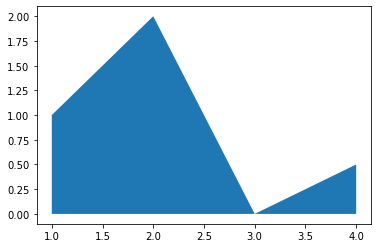

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.fill_between([1, 2, 3, 4], [1, 2, 0, 0.5])
plt.show()
    

In [3]:


import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = DataFrame(cars, columns= ['Brand', 'Price'])


root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()